In [1]:
from selenium import webdriver
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import time

ts_ms = pd.date_range(start = '2020-09-01', end = None, periods = 101, freq = 'D')
ts_list = list(map(str, list(ts_ms)))

def str_slicing(x):
    x = x[:10]
    return x

date_list = list(map(str_slicing, ts_list))
print(date_list)

['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04', '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11', '2020-09-12', '2020-09-13', '2020-09-14', '2020-09-15', '2020-09-16', '2020-09-17', '2020-09-18', '2020-09-19', '2020-09-20', '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25', '2020-09-26', '2020-09-27', '2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04', '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-10', '2020-10-11', '2020-10-12', '2020-10-13', '2020-10-14', '2020-10-15', '2020-10-16', '2020-10-17', '2020-10-18', '2020-10-19', '2020-10-20', '2020-10-21', '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25', '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29', '2020-10-30', '2020-10-31', '2020-11-01', '2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05', '2020-11-06', '2020-11-07', '2020-11-08', '2020-11-09', '2020-11-10', '2020

In [2]:
##  AWS에서 실행할 경우  ##
# chrome_options = webdriver.ChromeOptions()
# chrome_options.add_argument('--headless')
# chrome_options.add_argument('--no-sandbox')
# chrome_options.add_argument('--disable-dev-shm-usage')

# driver = webdriver.Chrome('/home/lab01/chromedriver', options=chrome_options)
# driver.implicitly_wait(3)
# driver.get("https://www.safetyreport.go.kr/#introduction/safeSingoStatistics")


##  local에서 실행할 경우  ##
options = webdriver.ChromeOptions()
driver = webdriver.Chrome('/Users/LimSH/Downloads/chromedriver_win32/chromedriver.exe', chrome_options=options)
driver.implicitly_wait(3)
driver.get("https://www.safetyreport.go.kr/#introduction/safeSingoStatistics")

C:\Users\LimSH\anaconda3\envs\pydatavenv\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: use options instead of chrome_options
  


In [3]:
i = 0
num_list = []
for date in date_list:
    if i == 0:
        i += 1
        target = driver.find_element_by_css_selector('#seachDateType')
        target.click()
        category = driver.find_element_by_css_selector('#seachDateType > option:nth-child(2)')
        category.click()
        time.sleep(2)
    
    start_date_element = driver.find_element_by_css_selector('#C_FRM_DATE')
    start_date_element.clear()
    start_date_element.send_keys(date)
    time.sleep(1)
    end_date_element = driver.find_element_by_css_selector('#C_TO_DATE')
    end_date_element.clear()
    end_date_element.send_keys(date)
    time.sleep(1)
    search_element = driver.find_element_by_css_selector('#form > fieldset > div > button')
    search_element.click()
    time.sleep(1)

    num = driver.find_element_by_css_selector('#grid > tbody > tr:nth-child(23) > td:nth-child(2) > a')
    print(date, ':', num.text)
    num_list.append(num.text)
    time.sleep(2)

2020-09-01 : 0
2020-09-02 : 0
2020-09-03 : 32
2020-09-04 : 143
2020-09-05 : 118
2020-09-06 : 82
2020-09-07 : 64
2020-09-08 : 117
2020-09-09 : 122
2020-09-10 : 125
2020-09-11 : 139
2020-09-12 : 143
2020-09-13 : 126
2020-09-14 : 117
2020-09-15 : 116
2020-09-16 : 148
2020-09-17 : 112
2020-09-18 : 114
2020-09-19 : 96
2020-09-20 : 93
2020-09-21 : 98
2020-09-22 : 93
2020-09-23 : 79
2020-09-24 : 91
2020-09-25 : 75
2020-09-26 : 95
2020-09-27 : 85
2020-09-28 : 103
2020-09-29 : 157
2020-09-30 : 102
2020-10-01 : 61
2020-10-02 : 110
2020-10-03 : 119
2020-10-04 : 97
2020-10-05 : 87
2020-10-06 : 71
2020-10-07 : 119
2020-10-08 : 102
2020-10-09 : 108
2020-10-10 : 76
2020-10-11 : 87
2020-10-12 : 84
2020-10-13 : 91
2020-10-14 : 139
2020-10-15 : 127
2020-10-16 : 117
2020-10-17 : 110
2020-10-18 : 104
2020-10-19 : 101
2020-10-20 : 104
2020-10-21 : 82
2020-10-22 : 95
2020-10-23 : 85
2020-10-24 : 60
2020-10-25 : 73
2020-10-26 : 83
2020-10-27 : 89
2020-10-28 : 91
2020-10-29 : 84
2020-10-30 : 86
2020-10-31 : 9

In [4]:
num_list = list(map(int, list(num_list)))
print(len(num_list))
print(num_list)

101
[0, 0, 32, 143, 118, 82, 64, 117, 122, 125, 139, 143, 126, 117, 116, 148, 112, 114, 96, 93, 98, 93, 79, 91, 75, 95, 85, 103, 157, 102, 61, 110, 119, 97, 87, 71, 119, 102, 108, 76, 87, 84, 91, 139, 127, 117, 110, 104, 101, 104, 82, 95, 85, 60, 73, 83, 89, 91, 84, 86, 95, 75, 67, 78, 76, 65, 91, 110, 68, 138, 104, 113, 158, 326, 312, 277, 325, 297, 338, 289, 324, 251, 205, 281, 318, 369, 403, 324, 276, 227, 276, 293, 308, 254, 282, 239, 221, 284, 219, 263, 259]


In [5]:
without_mask = pd.DataFrame(index = date_list, data = num_list)
without_mask.columns = ['마스크 미착용 신고건수']
display(without_mask)

,마스크 미착용 신고건수
2020-09-01,0
2020-09-02,0
2020-09-03,32
2020-09-04,143
2020-09-05,118
...,...
2020-12-06,221
2020-12-07,284
2020-12-08,219
2020-12-09,263


In [6]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

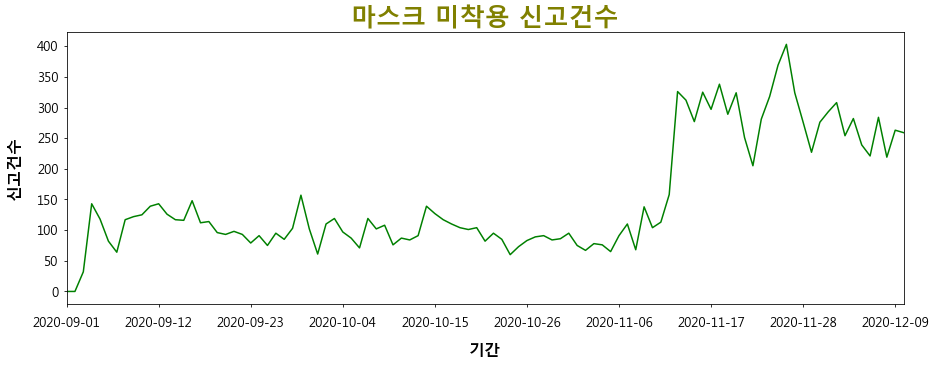

In [13]:
from matplotlib import rcParams

plt.figure(figsize=(15,5))
plt.plot(without_mask.index, without_mask.values, color='green')
#plt.plot(without_mask.index, without_mask.values, marker='o', markersize=5, color='green', markerfacecolor='yellow')

plt.title('마스크 미착용 신고건수', size=25, color='olive', fontweight='bold')
plt.xticks(without_mask.index, size=13)
plt.yticks(size=13) 
plt.xlabel('기간', size=16, fontweight='bold', labelpad=13)
plt.ylabel('신고건수', size=16, fontweight='bold', labelpad=13)
plt.locator_params(axis='x', nbins=10)
plt.tick_params(axis='x', direction='out', length=3, pad=10, bottom=True)
plt.tick_params(axis='y', direction='out', length=3, pad=5, left=True)
plt.xlim(without_mask.index[0], without_mask.index[-1])

plt.show()